<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/Tuto_convolution_pikachu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutoriel CNN wilfrid Morel Pour mes étudiants

Comprendre le principe de filtre de convolution ( Kernel)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf


In [2]:
base_path = "/content/drive/My Drive/pikachu_CNN/"

In [3]:
image_path = os.path.join(base_path, "pikachu.jpg")
image = cv2.imread(image_path)

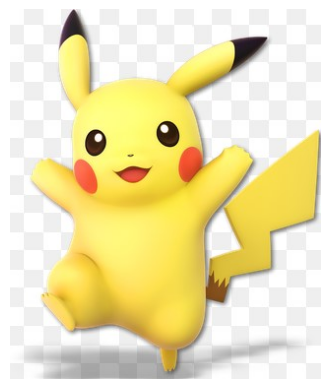

In [4]:
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour matplotlib
plt.show()

Afficher les datas

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]]], dtype=uint8)
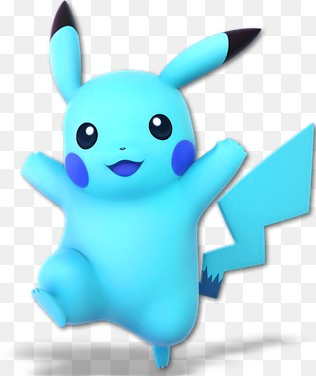

In [6]:
image #en BGR (Blue, Green, Red)

In [7]:
#afficher les pixels
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [239 239 239]
  [239 239 239]
  [239 239 239]]

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [239 239 239]
  [239 239 239]
  [239 239 239]]

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [239 239 239]
  [239 239 239]
  [239 239 239]]]


In [10]:
image.shape

(376, 316, 3)

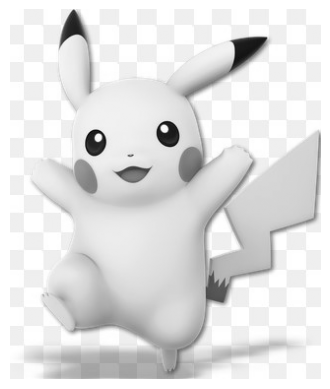

In [5]:



# Conversion de BGR à niveaux de gris
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Affichage en niveaux de gris
plt.axis('off')
plt.imshow(image_gray, cmap='gray')
plt.show()

In [8]:
#afficher les pixels
print(image_gray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]]


In [9]:
image_gray.shape

(376, 316)

Convolution

---



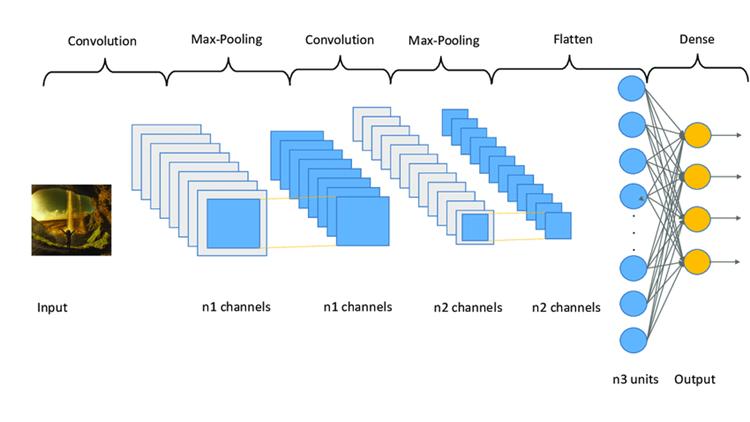

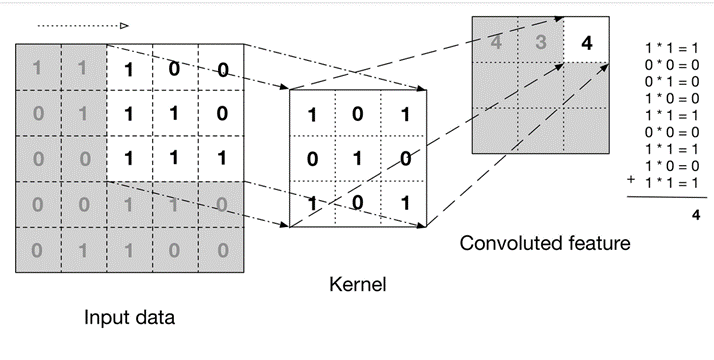

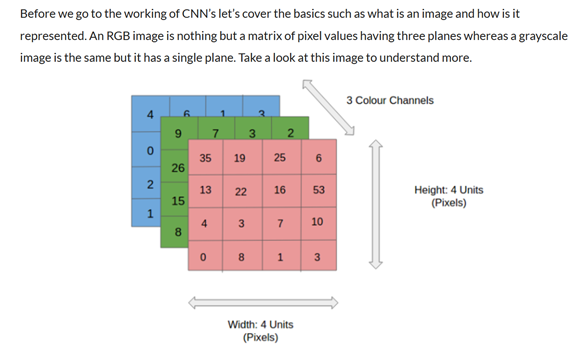

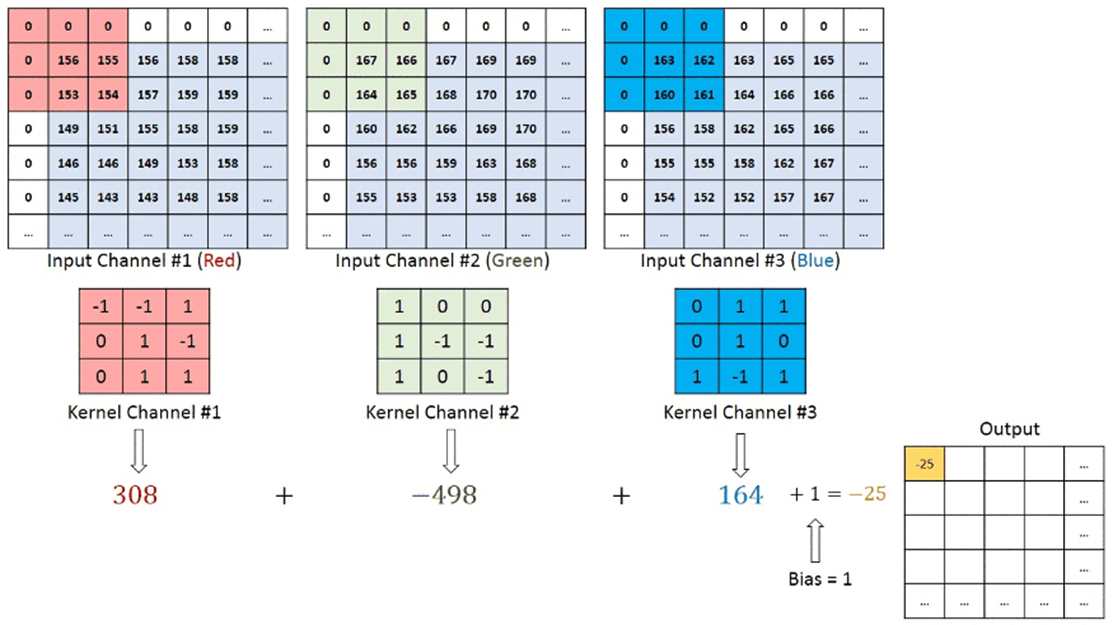

Interet de la convolution

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


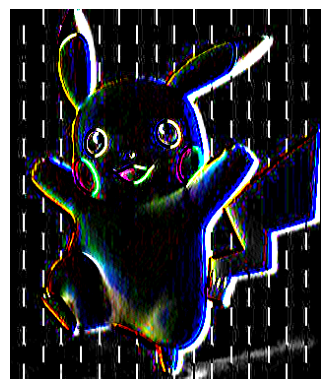

In [12]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(image, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


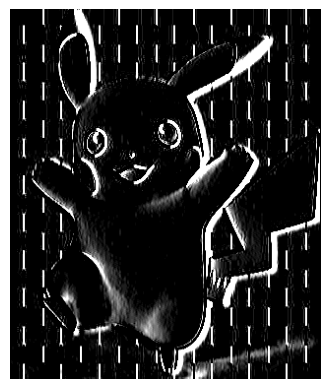

In [14]:
 #defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(image_gray, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))



---



[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


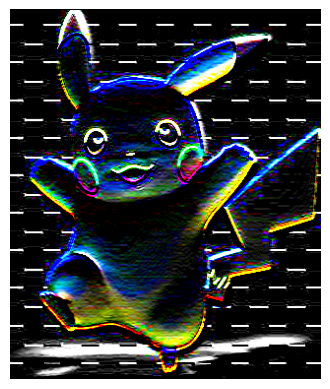

In [17]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_3 = cv2.filter2D(image, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))



---



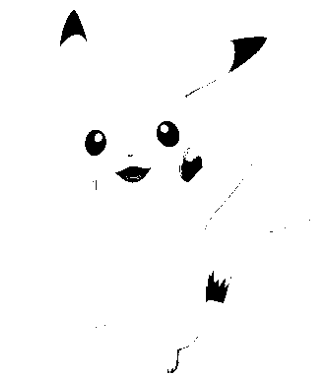

In [19]:
# Appliquer un seuillage (thresholding)
(thresh, img_bw) = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Affichage de l'image binaire en niveaux de gris
plt.axis('off')
plt.imshow(img_bw, cmap='gray')  # Utilisation de 'gray' pour afficher l'image en niveaux de gris
plt.show()

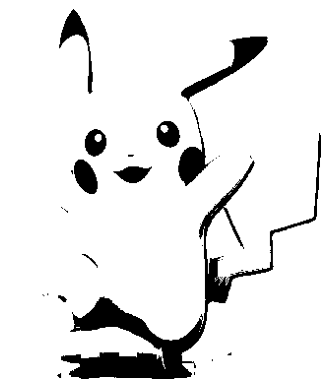

In [21]:
# Appliquer un seuillage (thresholding)
(thresh, img_bw) = cv2.threshold(image_gray, 180, 255, cv2.THRESH_BINARY)

# Affichage de l'image binaire en niveaux de gris
plt.axis('off')
plt.imshow(img_bw, cmap='gray')  # Utilisation de 'gray' pour afficher l'image en niveaux de gris
plt.show()

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


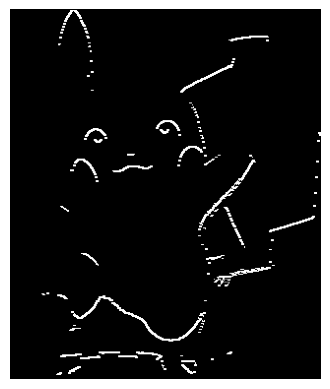

In [22]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_3 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))